# Data Preprocessing

Before we do this data split, we need to do several data preprocessing. The first thing is to seperate the categorical data from the rest of the data frame. After that, we can encode those features using one hot encoding from scikit-learn.

In [170]:
# import all the main libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%config IPCompleter.greedy=True
%config IPCompleter.use_jedi=False

# Display all the columns in pandas without being truncated
pd.options.display.max_columns = None

In [171]:
employee_df = pd.read_csv('Datasets/employee_df.csv', )
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [172]:
# Obtain all the column names from the dataframe
columns = employee_df.columns.to_list()

# Seperate the categorical data from the rest of the data frame. 
cat_columns = [col for col in columns if employee_df[col].dtype == 'O']
print(cat_columns)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']


In [173]:
cat_df = employee_df[cat_columns]
cat_df.head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married


## One Hot Encoding
To feed the categorical data into a machine learning model, we need to convert them into numbers. In other words, we need to encode that information. The library Scikit-learn helps us achieve this. 

In [174]:
from sklearn.preprocessing import OneHotEncoder

In [175]:
onehotencode = OneHotEncoder()
X_cat = onehotencode.fit_transform(cat_df).toarray()

In [176]:
X_cat

array([[0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [177]:
X_cat.shape

(1470, 26)

In [178]:
X_cat = pd.DataFrame(X_cat)
X_cat

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Combine All the Numerical Values

In [179]:
# Obtain the numeral columns beside the categorical ones and Attrition
num_col = [col for col in columns if (col not in cat_columns) and (col != 'Attrition')]

X_num = employee_df[num_col]
X_num

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [180]:
# concate the dataframe between the numerical and the one-hot categorical
X = pd.concat([X_cat, X_num], axis=1)
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,41,1102,1,2,2,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,49,279,8,1,3,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,37,1373,2,2,4,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,33,1392,3,4,4,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,591,2,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36,884,23,2,3,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,39,613,6,1,4,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,155,4,3,2,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,49,1023,2,3,4,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8


In [181]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

## Training and Test Split

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [184]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1102, 50)
(1102,)
(368, 50)
(368,)


## Data Normalization

Once we convert all the data into a numerical value, we need to make sure to scale the data. By doing this, there would be no feature that takes over or becomes dominant due to its higher value. 


The scaling process is called __Normalization__, which means rescales the values into a range of [0,1].

In [185]:
from sklearn.preprocessing import MinMaxScaler

In [186]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [187]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Key Performance Indicators

## Confusion Matrix
The confusion matrix is used to describe the performance of a classification model. It will have columns corresponding to the ground truth (true labels) and rows representing the predictions.
- __True Positive (TP)__. The classifier predicts TRUE (positive), and the correct class is also TRUE (positive).
- __False Positive (FP)__. The classifier predicts TRUE (positive), but the correct class is FALSE (negative). This is also known as __Type 1 Error__.
- __True Negative (TN)__. The classifier predicts FALSE (negative), and the correct class is also FALSE (negative).
- __False Negative (FN)__. The classifier predicts FALSE (negative), but the correct class is TRUE (positive). This is also known as __Type 2 Error__.

In [188]:
np.random.seed(1)
y_pred_dum = np.random.randint(0,2, 294)

In [190]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
# cm = confusion_matrix(y_test, y_pred_dum)
# cm = ConfusionMatrixDisplay(cm)
# cm.plot()

## Accuracy vs Precision vs Recall
- __Classification Accuracy__ = $\frac{(TP + TN)}{(TP + FP + TN + FN)}$


- __Precision__ = $\frac{(TP)}{(TP + FP)}$. When the model predicted TRUE class, how often was it right?


- __Recall__ = $\frac{(TP)}{(TP + FN)}$. When the actual class is TRUE, how often did the model get it right?

### Scenario
For example, we have 100 patients, where 91 are healthy and 9 patients have Cancer (__imbalanced dataset__ -> _any dataset with an unequal class distribution_). In this case, we have built a classifier with the followings performance:
- TP = 1
- FP = 1
- TN = 90
- FN = 8

Performance:
- __Classification accuracy__ = (90 + 1) / 100 = 91%. 
- __Precision__ = (1) / (1+1) = 50%.
- __Recall__ = (1) / (1 + 8) = 11,1%.

Insight:
- As you can see, the model can predict really well according to this KPI. But, does it? __Accuracy is generally misleading__ and is not enough to assess the performance of a classifier, especially for an imbalanced dataset. 
- Among the 2 positives the model has predicted, one of them was right, resulting in 50% precision. It indicates the model is not even precise at all.
- Recall is an important KPI in situations where dataset is highly imbalanced; cases when you have small cancer patients compared to healthy ones.
- The model is actually quite useless, because the model only got 1 patient out of 9 patients right about cancer. We can see from the recall KPI that the model only got 11%, which is pretty bad. 

Conclusion:
- It's really crucial to take a look at classification accuracy, along with precision and recall for classification problems, especially with an unbalanced dataset like this one.

## F1 Score
<h3 align="center">$F1 Score = \frac{2*(Precision*Recall)}{(Precision + Recall)}$</h3>
<h3 align="center">$F1 Score = \frac{2*TP}{(2*TP)+FP+FN}$</h3>


- The F1 score is an overall measure of a model's accuracy that combines precision and recall. 
- We can think of it as the harmonic mean of precision and recall
- What's __the difference between the F1 score and Accuracy?__
    - In unbalances datasets, if we have large numbers of true negatives (healthy patients), accuracy could be misleading. Therefore, F1 score could be a better KPI to use since it provides a balance between precision and recall in the presence of unbalanced datasets. 

# Model Building

## Logistic Regression

In [193]:
from sklearn.linear_model import LogisticRegression
model_1 = LogisticRegression()

In [194]:
# train the logistic regression model
model_1.fit(X_train, y_train)

LogisticRegression()

In [197]:
# make new predictions
y_predict = model_1.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Classification Accuracy

In [286]:
from sklearn.metrics import confusion_matrix, accuracy_score

print('Accuracy: {:.2f}%'.format(100*accuracy_score(y_test, y_predict)))

Accuracy: 86.96%


### Confusion Matrix

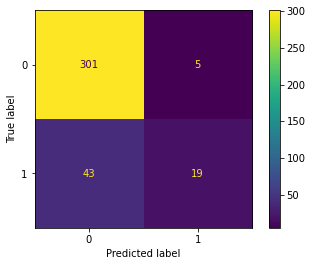

In [218]:
cm = confusion_matrix(y_test, y_predict)
cmdisplay = ConfusionMatrixDisplay(cm)
cmdisplay.plot()

### Classification Report

In [212]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       306
           1       0.79      0.31      0.44        62

    accuracy                           0.87       368
   macro avg       0.83      0.65      0.68       368
weighted avg       0.86      0.87      0.84       368



### Analysis

- The model accuracy achieved 87%, which is pretty good. However, the model suffers in the precision and recall scores. This is because the dataset we have is a good example of imbalanced dataset.
- As you can see, recall in the class 1 is not great, only 31%. We will see how we can improve the performance using another model such as random forest, or artificial neural networks. 
- Overall, the F1 score is around 93% on class  0 and 44% on class 1. 

## Random Forest Classifier

In [225]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier()

In [226]:
# train the random forest classifier model
model_2.fit(X_train, y_train)

RandomForestClassifier()

In [227]:
# make new predictions
y_predict_2 = model_2.predict(X_test)

### Classification Accuracy

In [285]:
print('Random Forest Classifier accuracy: {:.2f}%'.format(100*accuracy_score(y_test, y_predict_2)))

Random Forest Classifier accuracy: 84.78%


### Confusion Matrix

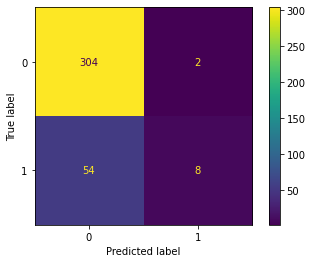

In [230]:
cm = confusion_matrix(y_test, y_predict_2)
cmdisplay = ConfusionMatrixDisplay(cm)
cmdisplay.plot()

### Classification Report

In [231]:
print(classification_report(y_test, y_predict_2))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       306
           1       0.80      0.13      0.22        62

    accuracy                           0.85       368
   macro avg       0.82      0.56      0.57       368
weighted avg       0.84      0.85      0.80       368



### Analysis
- The model achieved 85% accuracy. However, although the recall and precision are pretty good for class 0, both values are really bad on class 0. 
- The overall F1-score is 92% on class  0, and 22% on class 1. 
- We can safely assume that the RFC model cannot outperform the logistic regression model.

## Feed Forward Neural Networks

In [232]:
import tensorflow as tf
from tensorflow.

In [263]:
# obtain the total number of features, which is 50
n_features = X_train.shape[1]

# create ann with 4 layers
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=500, activation='relu', input_shape=(n_features,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=500, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

model_3.compile( optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model_3.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 500)               25500     
_________________________________________________________________
dropout_10 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_11 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 500)               250500    
_________________________________________________________________
dropout_12 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [264]:
# Create a checkpoint callbacks
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='ann.h5', 
                                                monitor='val_acc', 
                                                save_best_only=True, 
                                                mode='max')
# train the model
history = model_3.fit(X_train, 
                      y_train, 
                      epochs=100, 
                      batch_size=32, 
                      validation_data=(X_test, y_test),
                      callbacks=[checkpoint])

Epoch 1/100
35/35 [==============================] - 1s 23ms/step - loss: 0.4302 - acc: 0.8330 - val_loss: 0.3804 - val_acc: 0.8315
Epoch 2/100
35/35 [==============================] - 1s 15ms/step - loss: 0.3793 - acc: 0.8448 - val_loss: 0.3707 - val_acc: 0.8587
Epoch 3/100
35/35 [==============================] - 1s 16ms/step - loss: 0.3647 - acc: 0.8448 - val_loss: 0.3370 - val_acc: 0.8668
Epoch 4/100
35/35 [==============================] - 0s 14ms/step - loss: 0.3404 - acc: 0.8684 - val_loss: 0.3215 - val_acc: 0.8560
Epoch 5/100
35/35 [==============================] - 1s 16ms/step - loss: 0.3434 - acc: 0.8838 - val_loss: 0.3187 - val_acc: 0.8777
Epoch 6/100
35/35 [==============================] - 0s 14ms/step - loss: 0.3206 - acc: 0.8848 - val_loss: 0.3373 - val_acc: 0.8614
Epoch 7/100
35/35 [==============================] - 1s 16ms/step - loss: 0.2881 - acc: 0.8911 - val_loss: 0.3196 - val_acc: 0.8832
Epoch 8/100
35/35 [==============================] - 0s 14ms/step - loss: 0.

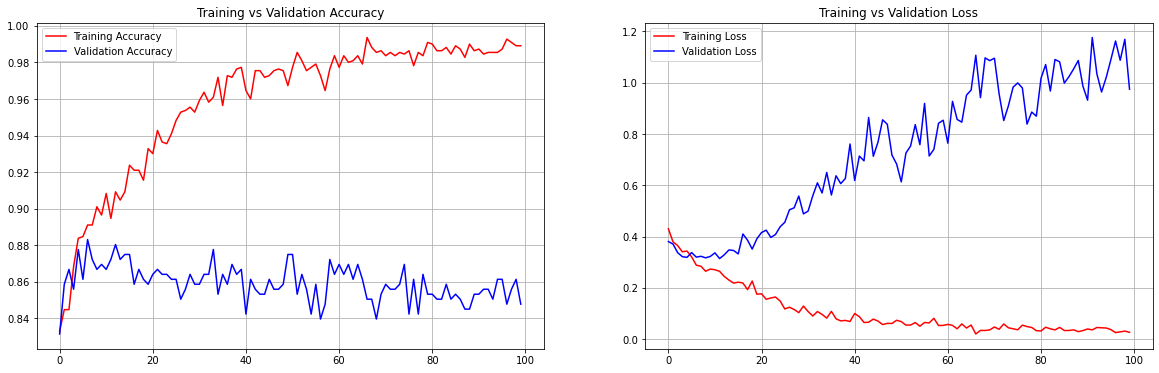

In [265]:
train_loss = history.history.get('loss')
train_acc = history.history.get('acc')
val_loss = history.history.get('val_loss')
val_acc = history.history.get('val_acc')

plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
plt.plot( history.epoch, train_acc, 'r', label='Training Accuracy')
plt.plot( history.epoch, val_acc, 'b', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot( history.epoch, train_loss, 'r', label='Training Loss')
plt.plot( history.epoch, val_loss, 'b', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.grid(True)
plt.legend()

plt.show()

In [267]:
from tensorflow.keras.models import load_model
model_3 = load_model('ann.h5')

### Classification Accuracy

In [278]:
loss, acc = model_3.evaluate(X_test, y_test)

12/12 [==============================] - 0s 4ms/step - loss: 0.3196 - acc: 0.8832


In [281]:
y_predict_3 = model_3.predict(X_test)
y_predict_3 = (y_predict_3>0.5)
y_predict_3

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [

In [284]:
print('ANN accuracy: {:.2f}%'.format(100*accuracy_score(y_test, y_predict_3)))

ANN accuracy: 88.32%


### Confusion Matrix

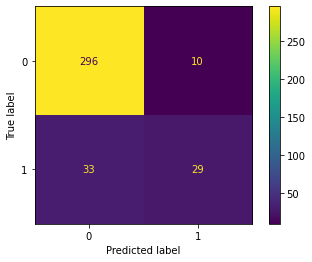

In [287]:
cm = confusion_matrix(y_test, y_predict_3)
cmdisplay = ConfusionMatrixDisplay(cm)
cmdisplay.plot()

### Classification Report

In [288]:
print(classification_report(y_test, y_predict_3))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       306
           1       0.74      0.47      0.57        62

    accuracy                           0.88       368
   macro avg       0.82      0.72      0.75       368
weighted avg       0.87      0.88      0.87       368



### Analysis

- The ann model achieved the highest accuracy among other models, with 88%.
- The ann model also has the highest value in F1-score, with 57%
- We can safely assume that the Ann model is the best model we can deliver to the department.